# Design CTP-14, mouse, next to CTP11,12,13 Chr7 regions

by Pu Zheng

2022.12.12


# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

<a id='0'></a>
# 0 Minimum required packages and settings

<a id='0.1'></a>
## 0.1 load required packages

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
from ImageAnalysis3 import library_tools
print(os.getpid())

23100


<a id='1'></a>
# 1 Extract region sequences

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")

Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain


In [3]:
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'mouse_brain_relabel_chr7')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

create library folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7
create sequence folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences
create report folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports
-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports


In [4]:
sel_chr = '7'

<a id='1.1'></a>
## 1.1 select regions

In [5]:
from tqdm.notebook import tqdm

In [44]:
# prepare sequence reader
reload(ia.library_tools.sequences)
resolution = 0
flanking = 0

seq_rd = ia.library_tools.sequences.sequence_reader(genome_folder, resolution=resolution, flanking=flanking)
seq_rd.load_ref_sequences() # load genomic sequences

-- load sequence: 1, size=195471971
-- load sequence: 2, size=182113224
-- load sequence: 3, size=160039680
-- load sequence: 4, size=156508116
-- load sequence: 5, size=151834684
-- load sequence: 6, size=149736546
-- load sequence: 7, size=145441459
-- load sequence: 8, size=129401213
-- load sequence: 9, size=124595110
-- load sequence: 10, size=130694993
-- load sequence: 11, size=122082543
-- load sequence: 12, size=120129022
-- load sequence: 13, size=120421639
-- load sequence: 14, size=124902244
-- load sequence: 15, size=104043685
-- load sequence: 16, size=98207768
-- load sequence: 17, size=94987271
-- load sequence: 18, size=90702639
-- load sequence: 19, size=61431566
-- load sequence: MT, size=16299
-- load sequence: X, size=171031299
-- load sequence: Y, size=91744698
-- load sequence: JH584299.1, size=953012
-- load sequence: GL456233.1, size=336933
-- load sequence: JH584301.1, size=259875
-- load sequence: GL456211.1, size=241735
-- load sequence: GL456350.1, size=227

<a id='1.2'></a>
## 1.2 input region information from previous codebook

In [45]:
prev_codebook_filename = os.path.join(
    r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\0814-Sample_Result_Blair',
    'merged_codebook.csv')
import pandas as pd
prev_codebook = pd.read_csv(prev_codebook_filename).set_index('Unnamed: 0')
prev_codebook

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1:11247744-11257616,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1:13741888-13757922,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,X:101961397-101974103,987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,X:136808741-136818926,988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979,X:140517829-140527051,989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
prev_codebook.loc[prev_codebook['chr'] == sel_chr]

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
383,7:6245207-6259885,403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384,7:16248012-16259975,407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
385,7:18740071-18759137,408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,7:26244483-26259941,411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387,7:28750208-28760000,412,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,7:132256661-132264746,432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,7:134668240-134677180,433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1439,7:136070464-136079456,434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# loop through regions in selected chr
length = 20000
region_dicts = []
for _i, (_reg_name, _rid) in prev_codebook.loc[prev_codebook['chr'] == sel_chr, ['name','id']].iterrows():
    _start,_end = _reg_name.split(f"{sel_chr}:")[1].split('-')
    #print(int(_end)-int(_start))
    region_dicts.append(
        {
            'Chr': sel_chr,
            'Start': f"{int(_start) - length}",
            'End': f"{_start}",
            'Region':f"{sel_chr}:{int(_start) - length}-{_start}",
            'Strand':'+',
            'Gene': _i,
        }
    )

In [83]:
seq_rd.seq_dict = {}

In [84]:
seqs = seq_rd.find_sequence_for_region(region_dicts)

-- searching among 1 references
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a match found in record: 7.
-- a ma

In [85]:
len(seq_rd.seq_dict)

96

In [86]:
seq_rd.save_sequences(save_folder=sequence_folder)

-- saving sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\383-seg-0.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\384-seg-0.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\385-seg-0.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\386-seg-0.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\387-seg-0.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\388-seg-0.fasta
-- save to file: \\10.245.7

<a id='2'></a>
# 2. Design probe targeting sequences by probe_designer

run probe_designer, remeber to clear the memory usage because each table should take ~32GB

<a id='2.1'></a>
## 2.1 Construct count table with all the 17-mers in the genome

Only do this if you don't have pre-built 17-mer

However you can do almost the same thing for your own library during quality check

This library requires mm10 genome

In [50]:
overwrite_table = False
from ImageAnalysis3 import library_tools

### construct map for whole genome

In [51]:
reload(library_tools.design)
 
genome_table_file = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')

if not os.path.exists(genome_table_file) or overwrite_table:
    # genome
    _genome_filenames = [os.path.join(genome_folder, _fl) 
         for _fl in os.listdir(genome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_genome_filenames))

    ct = library_tools.design.countTable(word=17,save_file=genome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_genome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()

    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {genome_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\GRCm38_genome_17w.npy already exist, skip.


### construct map for transcriptome

In [52]:
from tqdm import tqdm
# transcriptome
transcriptome_folder = os.path.join(reference_folder, 'Transcriptome')

transcriptome_table_file = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy')

if not os.path.exists(transcriptome_table_file) or overwrite_table:
    # transcriptome
    _transcriptome_filenames = [os.path.join(transcriptome_folder, _fl) 
         for _fl in os.listdir(transcriptome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_transcriptome_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=transcriptome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_transcriptome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {transcriptome_table_file} already exist, skip.")

reference table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\GRCm38_transcriptome_17w.npy already exist, skip.


### construct map for repeats from RepBase

In [61]:
%%time
# repeat
repeat_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\Repbase'

repeat_table_file = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')

if not os.path.exists(repeat_table_file) or overwrite_table:
    # repeat
    _repeat_filenames = [os.path.join(repeat_folder, _fl) 
         for _fl in os.listdir(repeat_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_repeat_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=repeat_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_repeat_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {repeat_table_file} already exist, skip.")

2
- Start multi-processing comsume 1810 sequences 24 threads, finish in 6.695s
- Total sequences loaded: 2602955
Time to compute unique and clip: 0.8485946655273438
Time to update matrix: 2.1205813884735107
- start saving to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\Repbase_v2603_repeat_17w.npy
Wall time: 54.9 s


### construct map for CTP11-13

In [59]:
%%time
# final ctp11,12,13
mouse_brain_library_file = os.path.join(reference_folder, 'mouse_brain_library_ctp11-12-13_17w.npy')
print(f"mouse brain library table: {mouse_brain_library_file}")
if not os.path.exists(mouse_brain_library_file) or overwrite_table:
    # directly input library files
    _library_filenames = [
        r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\mouse_genome_1000\blast_full_probes.fasta',
        r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-12_mop_markers\marker_gene_TSS\blast_full_probes.fasta',
        r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-13_brain-super-enhancers\mop_SE_1000\blast_full_probes.fasta',
    ]
    print(f"{len(_library_filenames)} input files.")
    
    ct = library_tools.design.countTable(word=17,save_file=mouse_brain_library_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_library_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=44) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {mouse_brain_library_file} already exist, skip.")

mouse brain library table: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\mouse_brain_library_ctp11-12-13_17w.npy
3 input files.
- Start multi-processing comsume 233855 sequences 44 threads, finish in 70.172s
- Total sequences loaded: 29391810
Time to compute unique and clip: 7.444552183151245
Time to update matrix: 10.16057801246643
- start saving to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\mouse_brain_library_ctp11-12-13_17w.npy
Wall time: 2min 16s


<a id='2.2'></a>
## 2.2 Design probes

In [65]:
print(report_folder)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports


In [87]:
# requires pre_defined genome_folder and library_folder
# Indices
genome_index = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')
#transcriptome_index = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy') 
repeat_index = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')
ref_library_index = os.path.join(reference_folder, 'mouse_brain_library_ctp11-12-13_17w.npy') # dna-merfish
# get input files 
input_files = [os.path.join(sequence_folder, _fl) for _fl in os.listdir(sequence_folder) if '.fasta' in _fl]

print(f"{len(input_files)} regions loaded to design probes.")

if not os.path.exists(report_folder):
    os.makedirs(report_folder)
    
# filename to save probe reports
probe_savefile = os.path.join(report_folder, f'mouse_brain_chr7_relabel.pbr')
print(probe_savefile)

96 regions loaded to design probes.
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports\mouse_brain_chr7_relabel.pbr


### create pb_designer class

In [88]:
reload(library_tools)
reload(library_tools.design)

pb_designer = library_tools.design.pb_reports_class(
    sequence_dic={'file':input_files,
                  'rev_com':True, # design two strands
                  'two_stranded':True},
    map_dic={'genome':{'file':genome_index,'rev_com':False,'two_stranded':True},
             #'transcriptome':{'file':transcriptome_index,'rev_com':True,'two_stranded':False},
             'rep_genome':{'file':repeat_index,'rev_com':False,'two_stranded':True},
             'self_sequences':{'file':input_files,'force_list':True,'rev_com':False,'two_stranded':True},
             'ref_library':{'file':ref_library_index,'rev_com':False,'two_stranded':True},
             },
        save_file=probe_savefile,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':0,'max_count':2**16-1,
                'check_on_go': False, # whether automatically check probes
                'auto': False, # whether automatically convert reference maps
               },
    check_dic={('genome','self_sequences'): 50, # 25
               'rep_genome': 0,
               #'transcriptome': 25, # 14
               'ref_library': 14,
               'gc':[0.25,0.85],'tm': 37+0.62*50+5,
               }
    )
print(pb_designer)
pb_designer.load_from_file(load_probes_only=True)


Probe designer derived from Bogdan Bintu:
https://github.com/BogdanBintu/ChromatinImaging/blob/master/LibraryDesign/LibraryDesigner.py
by Pu Zheng, 2020.11

Major changes:
    1. allow design of two strands
    2. separate reverse_complement (rev_com) and from two strands (two_stranded) as 
    two different inputs for map_dic and sequence_dic
    3. replace 'local_genome' with 'self_sequences' to be more explicit, and only 
    exclude the counts for the corresponding self_sequence within each input. 

Key information:
    - number of input_sequence(s): 96
    - save_file location: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports\mouse_brain_chr7_relabel.pbr

- Fail to load from savefile: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports\mouse_brain_chr7_relabel.pbr, file doesn't exist.


False

### calculate probe reports

In [89]:
%%time
pb_designer.computeOTmaps() # load the tables 
pb_designer.compute_pb_report() # design candidate probes

-- setting attribute: map_genome
--- finish map_genome in 69.628s.
-- setting attribute: map_rep_genome
--- finish map_rep_genome in 64.836s.
-- setting attribute: map_ref_library
--- finish map_ref_library in 64.071s.
Time(s): 198.53534173965454
- Designing targeting sequence for 96 regions
-- designing region: 7:6225207-6245207_strand_+_gene_383 -- region: 0, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\383-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.220s.
- Designed 39920 candidate probes in 10.702s.
-- designing region: 7:16228012-16248012_strand_+_gene_384 -- region: 1, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\384-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.604s.
- Designed 39920 candidate probes i

--- finish map_self_sequences in 0.557s.
- Designed 39920 candidate probes in 11.067s.
-- designing region: 7:81227806-81247806_strand_+_gene_406 -- region: 23, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\406-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.535s.
- Designed 39920 candidate probes in 11.033s.
-- designing region: 7:83728496-83748496_strand_+_gene_407 -- region: 24, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\407-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.506s.
- Designed 39920 candidate probes in 11.028s.
-- designing region: 7:86220611-86240611_strand_+_gene_408 -- region: 25, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences

--- finish map_self_sequences in 1.862s.
- Designed 39920 candidate probes in 18.602s.
-- designing region: 7:138731656-138751656_strand_+_gene_429 -- region: 46, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\429-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.813s.
- Designed 39920 candidate probes in 13.158s.
-- designing region: 7:141230556-141250556_strand_+_gene_430 -- region: 47, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\430-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 1.824s.
- Designed 39920 candidate probes in 15.561s.
-- designing region: 7:143732889-143752889_strand_+_gene_431 -- region: 48, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\seq

--- finish map_self_sequences in 0.641s.
- Designed 39920 candidate probes in 11.248s.
-- designing region: 7:82809265-82829265_strand_+_gene_1415 -- region: 69, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\1415-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.638s.
- Designed 39920 candidate probes in 11.238s.
-- designing region: 7:83053025-83073025_strand_+_gene_1416 -- region: 70, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\1416-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.637s.
- Designed 39920 candidate probes in 11.419s.
-- designing region: 7:83636608-83656608_strand_+_gene_1417 -- region: 71, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequ

--- finish map_self_sequences in 0.680s.
- Designed 39920 candidate probes in 11.251s.
-- designing region: 7:134648240-134668240_strand_+_gene_1438 -- region: 92, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\1438-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.682s.
- Designed 39920 candidate probes in 11.245s.
-- designing region: 7:136050464-136070464_strand_+_gene_1439 -- region: 93, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences\1439-seg-0.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.685s.
- Designed 39920 candidate probes in 11.281s.
-- designing region: 7:138193625-138213625_strand_+_gene_1440 -- region: 94, input file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr

### check probes

In [90]:
%%time
pbs, pb_scores = pb_designer.check_probes()

-- check region:0 7:6225207-6245207_strand_+_gene_383, 39192 candidate probes
--- 12326 probes passed check_dic selection.
finish in 1.549s, 195 probes kept.
-- check region:1 7:16228012-16248012_strand_+_gene_384, 39456 candidate probes
--- 17790 probes passed check_dic selection.
finish in 1.285s, 246 probes kept.
-- check region:2 7:18720071-18740071_strand_+_gene_385, 39832 candidate probes
--- 14724 probes passed check_dic selection.
finish in 1.174s, 247 probes kept.
-- check region:3 7:26224483-26244483_strand_+_gene_386, 38860 candidate probes
--- 6548 probes passed check_dic selection.
finish in 0.849s, 100 probes kept.
-- check region:4 7:28730208-28750208_strand_+_gene_387, 39138 candidate probes
--- 23402 probes passed check_dic selection.
finish in 1.485s, 271 probes kept.
-- check region:5 7:31221413-31241413_strand_+_gene_388, 36662 candidate probes
--- 2942 probes passed check_dic selection.
finish in 0.686s, 70 probes kept.
-- check region:6 7:33720106-33740106_strand_

-- check region:51 7:4474500-4494500_strand_+_gene_1397, 39882 candidate probes
--- 29306 probes passed check_dic selection.
finish in 1.746s, 325 probes kept.
-- check region:52 7:25617152-25637152_strand_+_gene_1398, 39908 candidate probes
--- 27436 probes passed check_dic selection.
finish in 1.672s, 310 probes kept.
-- check region:53 7:28170401-28190401_strand_+_gene_1399, 39706 candidate probes
--- 29420 probes passed check_dic selection.
finish in 1.748s, 319 probes kept.
-- check region:54 7:28560710-28580710_strand_+_gene_1400, 39918 candidate probes
--- 32078 probes passed check_dic selection.
finish in 1.795s, 329 probes kept.
-- check region:55 7:30258706-30278706_strand_+_gene_1401, 39520 candidate probes
--- 23338 probes passed check_dic selection.
finish in 1.503s, 280 probes kept.
-- check region:56 7:30887838-30907838_strand_+_gene_1402, 38856 candidate probes
--- 22048 probes passed check_dic selection.
finish in 1.436s, 258 probes kept.
-- check region:57 7:35710849-

### save probes

In [91]:
overwrite_savefile = True 
if not os.path.exists(pb_designer.save_file) or overwrite_savefile:
    #pb_designer.plots()
    #pb_designer.save_csv()
    pb_designer.save_to_file()
print(f"-- number of probes kept: {len(pb_designer.kept_probes)}")

- Save reports into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports\mouse_brain_chr7_relabel.pbr
-- number of probes kept: 24518


In [ ]:
del(pb_designer)

## Reload from here:

In [92]:
from ImageAnalysis3 import library_tools
reload(library_tools)
reload(library_tools.design)

if 'probe_savefile' not in locals():
    probe_savefile = os.path.join(report_folder, f'mouse_brain_chr7_relabel.pbr')
    print(probe_savefile)

# Parse segemented list
if 'pb_designer' not in locals():
    pb_designer = library_tools.design.pb_reports_class()
    pb_designer.load_from_file(probe_savefile)
else:
    print("pb_designer already exists in RAM, skip.")

pb_designer already exists in RAM, skip.


## assemble pb_dict

In [94]:
overwrite_pb_dict = False
verbose = True
pb_dict_filename = os.path.join(report_folder, 'pb_dict.pkl')

cand_prob_nums = []
pb_dict = {}

if not os.path.exists(pb_dict_filename) or overwrite_pb_dict:
    # get genes
    print("Sort genes")
    gene_names = np.unique([_v['reg_name'].split('gene_')[1] for _s, _v in pb_designer.kept_probes.items()])
    #region_inds = np.unique()
    print(f"- {len(gene_names)} genes")
    for _gene_name in sorted(gene_names, key=lambda v:int(v)):
        _sel_pbs = {_s:_v for _s, _v in pb_designer.kept_probes.items() if _v['reg_name'].split('gene_')[1]==_gene_name}

        if len(_sel_pbs) > 0:
            cand_prob_nums.append(len(_sel_pbs))
            if verbose:
                print(f"-- appending region:{_gene_name} with {len(_sel_pbs)} probes")
            _splitted_pbde = library_tools.design.pb_reports_class()
            _splitted_pbde.kept_probes = _sel_pbs
            pb_dict[_gene_name] = _splitted_pbde
    # sazve
    print(f"Saving pb_dict into file: {pb_dict_filename}")
    pickle.dump(pb_dict, open(pb_dict_filename, 'wb'))
else:
    print(f"Loading pb_dict from file: {pb_dict_filename}")
    pb_dict = pickle.load(open(pb_dict_filename, 'rb'))


Sort genes
- 96 genes
-- appending region:383 with 195 probes
-- appending region:384 with 246 probes
-- appending region:385 with 247 probes
-- appending region:386 with 100 probes
-- appending region:387 with 271 probes
-- appending region:388 with 70 probes
-- appending region:389 with 157 probes
-- appending region:390 with 259 probes
-- appending region:391 with 254 probes
-- appending region:392 with 310 probes
-- appending region:393 with 79 probes
-- appending region:394 with 172 probes
-- appending region:395 with 189 probes
-- appending region:396 with 289 probes
-- appending region:397 with 283 probes
-- appending region:398 with 117 probes
-- appending region:399 with 295 probes
-- appending region:400 with 215 probes
-- appending region:401 with 303 probes
-- appending region:402 with 290 probes
-- appending region:403 with 290 probes
-- appending region:404 with 198 probes
-- appending region:405 with 271 probes
-- appending region:406 with 268 probes
-- appending region:

<IPython.core.display.Javascript object>


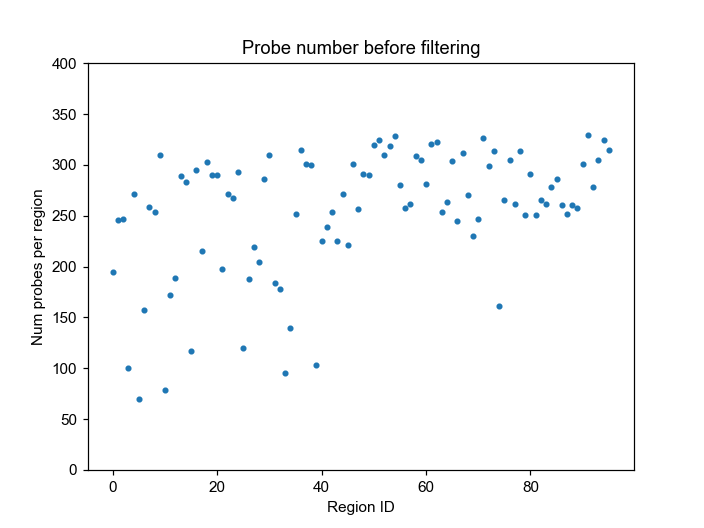

In [97]:
# number of probes histogram
fig, ax = plt.subplots()
ax.plot(cand_prob_nums, '.')
ax.set_ylabel("Num probes per region")
ax.set_xlabel("Region ID")
ax.set_title("Probe number before filtering")
ax.set_ylim([0,400])
plt.show()

In [98]:
# filter by genome counts
reload(library_tools.quality_check)

num_probes_kept = 120 # max num of probes kept for each region
filtered_pb_dict = library_tools.quality_check.Screen_probe_by_hit(library_folder, pb_dict, num_probes_kept,
                                                                  hit_type='genome')

## filter by minimum number of probes in each region
min_num_probes = 21
removed_regions = []
for _rid, _pb_class in filtered_pb_dict.items():
    if len(_pb_class.kept_probes) < min_num_probes:
        print(f"region: {_rid} removed with {len(_pb_class.kept_probes)} probes")
        removed_regions.append(_rid)
for _rid in removed_regions:
    del(filtered_pb_dict[_rid])

- Screen probes by genome counts.
-- filtering region:383, screen genome to keep 120 probes
-- filtering region:384, screen genome to keep 120 probes
-- filtering region:385, screen genome to keep 120 probes
-- filtering region:386, directly append 100 probes
-- filtering region:387, screen genome to keep 120 probes
-- filtering region:388, directly append 70 probes
-- filtering region:389, screen genome to keep 120 probes
-- filtering region:390, screen genome to keep 120 probes
-- filtering region:391, screen genome to keep 120 probes
-- filtering region:392, screen genome to keep 120 probes
-- filtering region:393, directly append 79 probes
-- filtering region:394, screen genome to keep 120 probes
-- filtering region:395, screen genome to keep 120 probes
-- filtering region:396, screen genome to keep 120 probes
-- filtering region:397, screen genome to keep 120 probes
-- filtering region:398, directly append 117 probes
-- filtering region:399, screen genome to keep 120 probes
-- fil

In [99]:
len(pb_dict), len(filtered_pb_dict)

(96, 96)

<IPython.core.display.Javascript object>


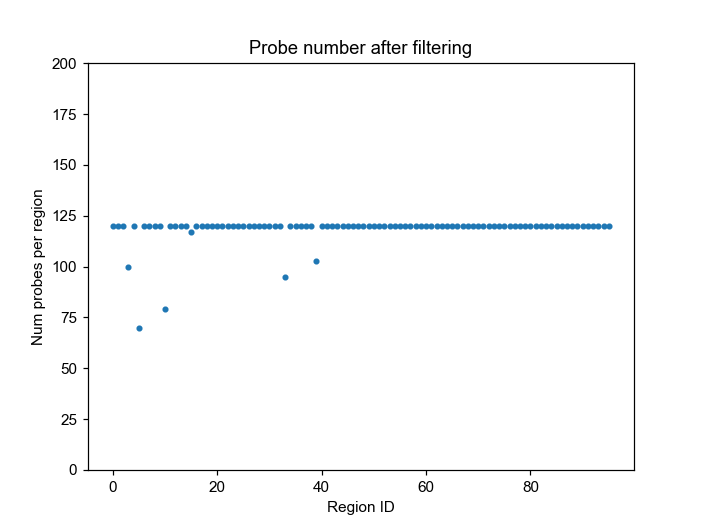

In [101]:
pb_num_dict = {_k:len(_v.kept_probes) for _k,_v in filtered_pb_dict.items()}

pb_nums = np.array(list(pb_num_dict.values()))
# number of probes histogram
fig, ax = plt.subplots()
ax.plot(pb_nums, '.')
ax.set_ylabel("Num probes per region")
ax.set_xlabel("Region ID")
ax.set_title("Probe number after filtering")
ax.set_ylim([0,200])
plt.show()

In [102]:
chr_2_region_savefile = os.path.join(library_folder, 'chr_2_final_region_num.pkl')
overwrite = True

filtered_reg_names = {}
for _reg, _pbde in filtered_pb_dict.items():
    if len(_pbde.kept_probes) > 0:
        filtered_reg_names[_reg] = list(_pbde.kept_probes.values())[0]['reg_name']

if not os.path.exists(chr_2_region_savefile) or overwrite:
    chr_2_region_num = {}
    for _reg, _info in filtered_reg_names.items():
        _chr = _info.split('_')[0].split(':')[0]
        if _chr not in chr_2_region_num:
            chr_2_region_num[_chr] = 1
        else:
            chr_2_region_num[_chr] += 1
    print(f"Saving into file: {chr_2_region_savefile}")

    pickle.dump(chr_2_region_num, open(chr_2_region_savefile, 'wb'))
else:
    print(f"loading from file: {chr_2_region_savefile}")
    chr_2_region_num = pickle.load(open(chr_2_region_savefile, 'rb'))

Saving into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\chr_2_final_region_num.pkl


In [103]:
chr_2_region_num

{'7': 96}

In [104]:
#
reg_2_start = {}

for _name, _info in filtered_reg_names.items():
    _locus = _info.split('_')[0]
    _start,_end = _locus.split(':')[1].split('-')
    reg_2_start[_name] = int(_start)
#    
chr_2_region_names = {}

for _reg, _info in filtered_reg_names.items():
    _chr = _info.split('_')[0].split(':')[0]
    if _chr not in chr_2_region_names:
        chr_2_region_names[_chr] = [_reg]
    else:
        chr_2_region_names[_chr].append(_reg)
# sort
for _chr, _regs in chr_2_region_names.items():
    _sorted_regs = sorted(_regs, key=lambda _r: reg_2_start[_r])
    chr_2_region_names[_chr] = _sorted_regs
    
overwrite_region_names = True
chr_2_region_name_savefile = os.path.join(library_folder, 'chr_2_region_names.pkl')

if not os.path.exists(chr_2_region_name_savefile) or overwrite_region_names:
    print(f"Saving region names into file: {chr_2_region_name_savefile}")
    pickle.dump(chr_2_region_names, open(chr_2_region_name_savefile, 'wb'))

Saving region names into file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\chr_2_region_names.pkl


<a id='3'></a>
# 3. Load and asssemble probes

In [106]:
region_2_readout_dict = {}
for _i, _reg in enumerate(pb_dict):
    region_2_readout_dict[_reg] = [f"u{_i}", f"u{_i+len(pb_dict)}"]
print(region_2_readout_dict)

{'383': ['u0', 'u96'], '384': ['u1', 'u97'], '385': ['u2', 'u98'], '386': ['u3', 'u99'], '387': ['u4', 'u100'], '388': ['u5', 'u101'], '389': ['u6', 'u102'], '390': ['u7', 'u103'], '391': ['u8', 'u104'], '392': ['u9', 'u105'], '393': ['u10', 'u106'], '394': ['u11', 'u107'], '395': ['u12', 'u108'], '396': ['u13', 'u109'], '397': ['u14', 'u110'], '398': ['u15', 'u111'], '399': ['u16', 'u112'], '400': ['u17', 'u113'], '401': ['u18', 'u114'], '402': ['u19', 'u115'], '403': ['u20', 'u116'], '404': ['u21', 'u117'], '405': ['u22', 'u118'], '406': ['u23', 'u119'], '407': ['u24', 'u120'], '408': ['u25', 'u121'], '409': ['u26', 'u122'], '410': ['u27', 'u123'], '411': ['u28', 'u124'], '412': ['u29', 'u125'], '413': ['u30', 'u126'], '414': ['u31', 'u127'], '415': ['u32', 'u128'], '416': ['u33', 'u129'], '417': ['u34', 'u130'], '418': ['u35', 'u131'], '419': ['u36', 'u132'], '420': ['u37', 'u133'], '421': ['u38', 'u134'], '422': ['u39', 'u135'], '423': ['u40', 'u136'], '424': ['u41', 'u137'], '425'

In [107]:
region_2_readout_dict

{'383': ['u0', 'u96'],
 '384': ['u1', 'u97'],
 '385': ['u2', 'u98'],
 '386': ['u3', 'u99'],
 '387': ['u4', 'u100'],
 '388': ['u5', 'u101'],
 '389': ['u6', 'u102'],
 '390': ['u7', 'u103'],
 '391': ['u8', 'u104'],
 '392': ['u9', 'u105'],
 '393': ['u10', 'u106'],
 '394': ['u11', 'u107'],
 '395': ['u12', 'u108'],
 '396': ['u13', 'u109'],
 '397': ['u14', 'u110'],
 '398': ['u15', 'u111'],
 '399': ['u16', 'u112'],
 '400': ['u17', 'u113'],
 '401': ['u18', 'u114'],
 '402': ['u19', 'u115'],
 '403': ['u20', 'u116'],
 '404': ['u21', 'u117'],
 '405': ['u22', 'u118'],
 '406': ['u23', 'u119'],
 '407': ['u24', 'u120'],
 '408': ['u25', 'u121'],
 '409': ['u26', 'u122'],
 '410': ['u27', 'u123'],
 '411': ['u28', 'u124'],
 '412': ['u29', 'u125'],
 '413': ['u30', 'u126'],
 '414': ['u31', 'u127'],
 '415': ['u32', 'u128'],
 '416': ['u33', 'u129'],
 '417': ['u34', 'u130'],
 '418': ['u35', 'u131'],
 '419': ['u36', 'u132'],
 '420': ['u37', 'u133'],
 '421': ['u38', 'u134'],
 '422': ['u39', 'u135'],
 '423': ['u40'

<a id='3.2'></a>
## 3.2 loading components

### primers
pick primer set 20,21

In [109]:
from ImageAnalysis3 import library_tools
primer_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Primers'
primers = library_tools.assemble.load_primers([4,3], _primer_folder=primer_folder)

- Picked primer: ID: W1A05_primer_4
Name: W1A05_primer_4
Description: W1A05_primer_4
Number of features: 0
Seq('CATTCAGCATTGCGCAACGG')
- Picked primer: ID: W1A04_primer_3
Name: W1A04_primer_3
Description: W1A04_primer_3
Number of features: 0
Seq('TAATACGACTCACTATAGGGCGTTGTATGCCCTCCACGC')


### readouts

In [110]:
# collect types from region_2_readout_dict
readout_usage_by_type = {}
for _region, _infos in region_2_readout_dict.items():
    for _info in _infos:
        if _info[0] not in readout_usage_by_type:
            readout_usage_by_type[_info[0]] = []
        if int(_info[1:]) not in readout_usage_by_type[_info[0]]:
            readout_usage_by_type[_info[0]].append(int(_info[1:]))

readout_usage_dict = {_type:len(_v) for _type,_v in readout_usage_by_type.items()}

In [112]:
from ImageAnalysis3.classes import _allowed_kwds

readout_dict ={}
overwrite_readout_usage = True
readout_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts'

# unique
readout_type = 'unique'
# 
_type_char = _allowed_kwds[readout_type]
_readout_start = 0
_num_color = 3

readout_dict[_type_char] = library_tools.assemble.load_readouts(readout_usage_dict[_type_char], 
                                                       _type='designed_readouts', 
                                                       _readout_folder=readout_folder, 
                                                       _num_colors=_num_color, # 750,647,561
                                                       _start_id=_readout_start,
                                                       )

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\designed_readouts_750.fasta 453 0 64
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\designed_readouts_647.fasta 453 0 64
\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Readouts\designed_readouts_561.fasta 452 0 64
[64, 64, 64]


In [114]:
readout_dict

{'u': [SeqRecord(seq=Seq('ACAAATCCGACCAGATCGGACGATCATGGG'), id='Stv_3', name='Stv_3', description='Stv_3 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AGACGACGCACGTTCGTACCGCGTACTTCG'), id='Stv_32', name='Stv_32', description='Stv_32 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('TTCCCGCCAATGACGTCGGTTTGGACGAGA'), id='Stv_91', name='Stv_91', description='Stv_91 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('CAAGTATGCAGCGCGATTGACCGTCTCGTT'), id='Stv_4', name='Stv_4', description='Stv_4 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('TTTGCTCGCAAGTGCGCACGAGTTGAACTG'), id='Stv_33', name='Stv_33', description='Stv_33 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('GCGTTGATGTCCCTTGTGAGCGCCCGACAT'), id='Stv_92', name='Stv_92', description='Stv_92 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AAGTCGTACGCCGATGCGCAGCAATTCACT'), id='Stv_5', name='Stv_5', description='Stv_5 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AGTTTCCATACGCGGCGTGAATATCGCGGC'), id='Stv_35', name='Stv_35', description

In [113]:
# save
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
if not os.path.isfile(readout_usage_file) or overwrite_readout_usage:
    print('save readout usage dict')
    pickle.dump(readout_dict, open(readout_usage_file, 'wb'))

save readout usage dict


<a id='3.3'></a>
## 3.3 assemble probes

In [115]:
reload(library_tools.assemble)
from ImageAnalysis3.library_tools.assemble import Assemble_probes

# params
assemble_params = {
    'primer_len':20,
    'num_readout_per_probe':4, 
}

In [116]:
# run assembly
cand_probes, readout_summary = Assemble_probes(library_folder, filtered_pb_dict, 
                                               region_2_readout_dict, readout_dict, primers, 
                                               primer_len=assemble_params['primer_len'], 
                                               num_readout_per_probe=assemble_params['num_readout_per_probe'], 
                                               unique_readout_per_probe=True,
                                               rc_targets=False, overwrite=True)

- Assemble probes by given target sequences, readouts and primers.
-- included readout types: ['u']
--- assemblying 120 probes in region: 383
--- assemblying 120 probes in region: 384
--- assemblying 120 probes in region: 385
--- assemblying 100 probes in region: 386
--- assemblying 120 probes in region: 387
--- assemblying 70 probes in region: 388
--- assemblying 120 probes in region: 389
--- assemblying 120 probes in region: 390
--- assemblying 120 probes in region: 391
--- assemblying 120 probes in region: 392
--- assemblying 79 probes in region: 393
--- assemblying 120 probes in region: 394
--- assemblying 120 probes in region: 395
--- assemblying 120 probes in region: 396
--- assemblying 120 probes in region: 397
--- assemblying 117 probes in region: 398
--- assemblying 120 probes in region: 399
--- assemblying 120 probes in region: 400
--- assemblying 120 probes in region: 401
--- assemblying 120 probes in region: 402
--- assemblying 120 probes in region: 403
--- assemblying 120 

# 4.Check quality


## 4.1 Load probes

Checking procedures could restart from here

In [117]:
# folder for this library
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# candidate full-length probe filename
candidate_basename = 'candidate_probes.fasta' # old version
# load full probes
full_records = []
with open(os.path.join(library_folder, candidate_basename), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        full_records.append(record)

print(f"Total probe loaded: {len(full_records)}")

Total probe loaded: 11364


### Manually input the following info to double check!

In [119]:
num_readout_per_probe = 4
primer_len=20
target_len=42
min_num_probes = 21
# merfish related
num_on_bits = 2

### 4.1.1 check primer usage

In [120]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
primer_check = check._check_primer_usage(full_records, primers[0], primers[1], primer_len=primer_len)
print(primer_check)

-- Checking primer usage, total probes: 11364
True


### 4.1.2 check region probe number

In [121]:
reload(check)
reg_size_dic, len_check = check._check_region_size(full_records, 
                                                   species_marker = 'gene_',
                                                   min_size=min_num_probes)
print(len_check)

gene: 383 -> 120
gene: 384 -> 120
gene: 385 -> 120
gene: 386 -> 100
gene: 387 -> 120
gene: 388 -> 70
gene: 389 -> 120
gene: 390 -> 120
gene: 391 -> 120
gene: 392 -> 120
gene: 393 -> 79
gene: 394 -> 120
gene: 395 -> 120
gene: 396 -> 120
gene: 397 -> 120
gene: 398 -> 117
gene: 399 -> 120
gene: 400 -> 120
gene: 401 -> 120
gene: 402 -> 120
gene: 403 -> 120
gene: 404 -> 120
gene: 405 -> 120
gene: 406 -> 120
gene: 407 -> 120
gene: 408 -> 120
gene: 409 -> 120
gene: 410 -> 120
gene: 411 -> 120
gene: 412 -> 120
gene: 413 -> 120
gene: 414 -> 120
gene: 415 -> 120
gene: 416 -> 95
gene: 417 -> 120
gene: 418 -> 120
gene: 419 -> 120
gene: 420 -> 120
gene: 421 -> 120
gene: 422 -> 103
gene: 423 -> 120
gene: 424 -> 120
gene: 425 -> 120
gene: 426 -> 120
gene: 427 -> 120
gene: 428 -> 120
gene: 429 -> 120
gene: 430 -> 120
gene: 431 -> 120
gene: 989 -> 120
gene: 1010 -> 120
gene: 1397 -> 120
gene: 1398 -> 120
gene: 1399 -> 120
gene: 1400 -> 120
gene: 1401 -> 120
gene: 1402 -> 120
gene: 1403 -> 120
gene: 140

<IPython.core.display.Javascript object>


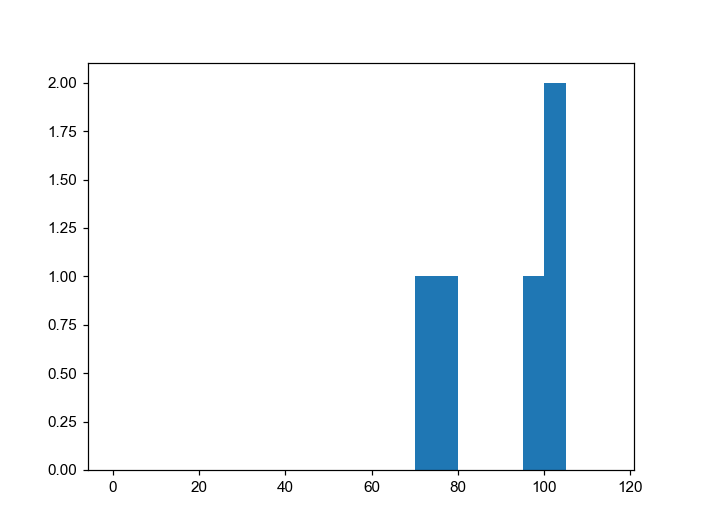

In [123]:
plt.figure()
plt.hist(list(reg_size_dic.values()), bins=np.arange(0,120,5))
plt.show()

### 4.1.3 check readout usage for each gene

In [124]:
reload(check)
check_readout_dict = pickle.load(open(os.path.join(library_folder, 'readout_usage.pkl'), 'rb'))

reg_readout_dic, reg2readout_check = check._check_region_to_readouts(full_records, check_readout_dict, 
                                                                     total_readout_num=num_on_bits)
print(reg2readout_check)

383 -> ['Stv_3', 'NDB_22']
384 -> ['Stv_32', 'NDB_23']
385 -> ['Stv_91', 'NDB_24']
386 -> ['Stv_4', 'NDB_25']
387 -> ['Stv_33', 'NDB_26']
388 -> ['Stv_92', 'NDB_27']
389 -> ['Stv_5', 'NDB_28']
390 -> ['Stv_35', 'NDB_29']
391 -> ['Stv_94', 'NDB_30']
392 -> ['Stv_6', 'NDB_31']
393 -> ['Stv_36', 'NDB_32']
394 -> ['Stv_95', 'NDB_33']
395 -> ['Stv_7', 'NDB_34']
396 -> ['Stv_37', 'NDB_35']
397 -> ['Stv_99', 'NDB_36']
398 -> ['Stv_8', 'NDB_37']
399 -> ['Stv_39', 'NDB_38']
400 -> ['Stv_100', 'NDB_39']
401 -> ['Stv_9', 'NDB_40']
402 -> ['Stv_40', 'NDB_41']
403 -> ['Stv_101', 'NDB_42']
404 -> ['Stv_10', 'NDB_43']
405 -> ['Stv_42', 'NDB_44']
406 -> ['Stv_104', 'NDB_45']
407 -> ['Stv_11', 'NDB_46']
408 -> ['Stv_44', 'NDB_47']
409 -> ['Stv_105', 'NDB_48']
410 -> ['Stv_12', 'NDB_49']
411 -> ['Stv_45', 'NDB_50']
412 -> ['Stv_106', 'NDB_51']
413 -> ['Stv_13', 'NDB_52']
414 -> ['Stv_46', 'NDB_53']
415 -> ['Stv_107', 'NDB_54']
416 -> ['Stv_14', 'NDB_55']
417 -> ['Stv_48', 'NDB_56']
418 -> ['Stv_109', 'N

### 4.1.4 check readout usage in the library

In [125]:
reload(check)
readout_reg_dic, readout2reg_check = check._check_readout_to_region(
    reg_readout_dic, full_records, 
    check_readout_dict, primer_len=primer_len, 
    target_len=target_len,
    probe_readout_num=num_readout_per_probe,
)
print(readout2reg_check)

-- extracting probes from >region:383, region:384, region:385, region:386, region:387, region:388, region:389, region:390, region:391, region:392, region:393, region:394, region:395, region:396, region:397, region:398, region:399, region:400, region:401, region:402, region:403, region:404, region:405, region:406, region:407, region:408, region:409, region:410, region:411, region:412, region:413, region:414, region:415, region:416, region:417, region:418, region:419, region:420, region:421, region:422, region:423, region:424, region:425, region:426, region:427, region:428, region:429, region:430, region:431, region:989, region:1010, region:1397, region:1398, region:1399, region:1400, region:1401, region:1402, region:1403, region:1404, region:1405, region:1406, region:1407, region:1408, region:1409, region:1410, region:1411, region:1412, region:1413, region:1414, region:1415, region:1416, region:1417, region:1418, region:1419, region:1420, region:1421, region:1422, region:1423, region:14

### 4.1.5 check bewteen probes

In [126]:
# construct internal map
reload(check)
int_map = check._construct_internal_map(full_records, library_folder, save=False) 

In [127]:
# internal check probes
readout_count_dic, readout_count_check = check._check_readout_in_probes(readout_reg_dic, reg_size_dic, int_map, readout_dict)
print(readout_count_check)

True


In [128]:
# check between probes
kept_records, removed_count = check._check_between_probes(full_records, int_map, 
                                                          primer_len=primer_len, 
                                                          target_len=target_len)

--- Sequence:loc_7:35710849-35730849_gene_1403_pb_67_pos_15264_strand_+_readouts_[NDB_79_u,NDB_79_u,NDB_79_u,NDB_79_u]_primers_[W1A05_primer_4,W1A04_primer_3] got hits:80, dumped
--- Sequence:loc_7:35710849-35730849_gene_1403_pb_68_pos_15345_strand_+_readouts_[Stv_26_u,Stv_26_u,Stv_26_u,Stv_26_u]_primers_[W1A05_primer_4,W1A04_primer_3] got hits:79, dumped
--- Sequence:loc_7:35710849-35730849_gene_1403_pb_69_pos_15393_strand_+_readouts_[NDB_79_u,NDB_79_u,NDB_79_u,NDB_79_u]_primers_[W1A05_primer_4,W1A04_primer_3] got hits:52, dumped
--- Sequence:loc_7:35710849-35730849_gene_1403_pb_70_pos_15454_strand_+_readouts_[Stv_26_u,Stv_26_u,Stv_26_u,Stv_26_u]_primers_[W1A05_primer_4,W1A04_primer_3] got hits:72, dumped
-- total probes removed by internal screening: 4


In [129]:
# clear memory
del(int_map)

### 4.1.6 finish checking, save

In [130]:
print(len(kept_records), len(cand_probes))

11360 11364


In [131]:
# save kept records
with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'w') as output_handle:
    SeqIO.write(kept_records, output_handle, "fasta")

## 4.2 BLAST screening of probes

create the local blast database by:
```bash
makeblastdb -in C:\Users\puzheng\Documents\Tools\lowercase_masked\Mus_musculus.GRCm38.dna_sm.merged.fa -dbtype nucl -parse_seqids -out GRCm38_ensembl -title "Mouse chromosomes soft masked" -blastdb_version 4![image.png](attachment:image.png)
```

The outputs are:
```bash
Building a new DB, current time: 03/30/2021 21:49:18
New DB name:   C:\Users\puzheng\Documents\Tools\GRCm38_ensembl
New DB title:  Mouse chromosomes soft masked
Sequence type: Nucleotide
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 66 sequences in 42.2668 seconds.
```

In [132]:
import ImageAnalysis3.library_tools.quality_check as check
reload(check)

<module 'ImageAnalysis3.library_tools.quality_check' from 'E:\\Users\\puzheng_new\\Documents\\Chromatin_Analysis_Scripts\\Library_design\\CTP-14-human_brain_genome\\..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\quality_check.py'>

In [133]:
if 'kept_records' not in locals() or len(kept_records) == 0:
    kept_records = []
    with open(os.path.join(library_folder, 'filtered_full_probes.fasta'), 'r') as handle:
        for record in SeqIO.parse(handle, "fasta"):
            kept_records.append(record)
print(len(kept_records))

11360


In [134]:
blast_database = os.path.join(reference_folder, 'blast_database', 'GRCm38_ensembl')

check.Blast_probes(kept_records, library_folder, num_threads=44, 
                   blast_db=blast_database, blast_evalue=100, overwrite=True)

- Blast probe against \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl\blast_database\GRCm38_ensembl
-- number of probes loaded: 11360
-- processing region: 1010 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_1010.fasta
--- *blasting region: 1010
--- total time for blast 1010: 6.221s.
-- processing region: 1397 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_1397.fasta
--- *blasting region: 1397
--- total time for blast 1397: 7.999s.
-- processing region: 1398 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_1398.fasta
--- *blasting region: 1398
--- total time for blast 1398: 6.052s.
-- processing region: 1399 with 120 probes
--- *writing file: \\10.245.74.212

--- total time for blast 1427: 7.159s.
-- processing region: 1428 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_1428.fasta
--- *blasting region: 1428
--- total time for blast 1428: 4.990s.
-- processing region: 1429 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_1429.fasta
--- *blasting region: 1429
--- total time for blast 1429: 7.178s.
-- processing region: 1430 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_1430.fasta
--- *blasting region: 1430
--- total time for blast 1430: 4.690s.
-- processing region: 1431 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_1431.fasta
--- *blasting regio

--- total time for blast 401: 5.571s.
-- processing region: 402 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_402.fasta
--- *blasting region: 402
--- total time for blast 402: 6.408s.
-- processing region: 403 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_403.fasta
--- *blasting region: 403
--- total time for blast 403: 4.411s.
-- processing region: 404 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_404.fasta
--- *blasting region: 404
--- total time for blast 404: 6.273s.
-- processing region: 405 with 120 probes
--- *writing file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\blast\probe_gene_405.fasta
--- *blasting region: 405
--- tota

### 4.2.1 screen probe by blast results

This step has 2 different cutoffs:

hard_cutoff: whether a probe has any ~40mer hit somewhere else, if so just dump the probe

soft_cutoff: whether a probe has a lot of ~20mer off-target hits, if exceed certain amount then dump the probe

In [135]:
# screen
import ImageAnalysis3.library_tools.quality_check as check
reload(check)
num_probes_per_region = 80
kept_pbs, blast_keep_dic, hard_count_list, soft_count_list = check.Screening_Probes_by_Blast(
    library_folder, 
    num_probes_per_region,
    keep_mode='end',
    hard_thres=target_len,
    soft_count_th=50,
)

- Number of probes loaded: 11360
- Number of regions in this library: 96
-- checking probes in region: 383
--- gene=383, id=16 removed by soft count = 600
--- gene=383, id=23 removed by soft count = 476
--- gene=383, id=24 removed by soft count = 562
--- gene=383, id=28 removed by soft count = 183
--- gene=383, id=29 removed by soft count = 294
--- gene=383, id=31 removed by soft count = 8137
--- gene=383, id=35 removed by soft count = 1828
--- gene=383, id=75 removed by soft count = 60
--- gene=383, id=87 removed by soft count = 182
--- gene=383, id=88 removed by soft count = 874
--- gene=383, id=91 removed by soft count = 799
--- number of probes: 120 , kept by blast: 109 , if remove dups: 109
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 384
--- gene=384, id=67 removed by soft count = 236
--- gene=384, id=79 removed by soft count = 84
--- gene=384, id=94 removed by soft count = 72
--- number of prob

--- gene=398, id=45 removed by soft count = 218
--- gene=398, id=46 removed by soft count = 1585
--- gene=398, id=47 removed by soft count = 22682
--- gene=398, id=48 removed by soft count = 516
--- gene=398, id=63 removed by soft count = 509
--- gene=398, id=91 removed by soft count = 245
--- gene=398, id=92 removed by soft count = 277
--- gene=398, id=115 removed by soft count = 210
--- gene=398, id=116 removed by soft count = 2802
--- number of probes: 117 , kept by blast: 105 , if remove dups: 105
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 399
--- gene=399, id=12 removed by soft count = 272
--- gene=399, id=20 removed by soft count = 2862
--- number of probes: 120 , kept by blast: 118 , if remove dups: 118
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 400
--- gene=400, id=3 removed by soft count = 618
--- gene=4

--- gene=417, id=18 removed by soft count = 86
--- gene=417, id=33 removed by soft count = 54
--- gene=417, id=44 removed by soft count = 86
--- gene=417, id=46 removed by soft count = 88
--- gene=417, id=47 removed by soft count = 183
--- gene=417, id=48 removed by soft count = 301
--- gene=417, id=50 removed by soft count = 126
--- gene=417, id=51 removed by soft count = 213
--- gene=417, id=52 removed by soft count = 374
--- gene=417, id=54 removed by soft count = 3385
--- gene=417, id=55 removed by soft count = 237
--- gene=417, id=57 removed by soft count = 215
--- gene=417, id=58 removed by soft count = 1477
--- gene=417, id=59 removed by soft count = 75
--- gene=417, id=60 removed by soft count = 294
--- gene=417, id=61 removed by soft count = 246
--- gene=417, id=62 removed by soft count = 383
--- gene=417, id=64 removed by soft count = 60
--- gene=417, id=65 removed by soft count = 2562
--- gene=417, id=70 removed by soft count = 225
--- gene=417, id=75 removed by soft count =

--- number of probes: 120 , kept by blast: 115 , if remove dups: 115
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 1399
--- number of probes: 120 , kept by blast: 120 , if remove dups: 120
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 1400
--- gene=1400, id=90 removed by soft count = 68
--- number of probes: 120 , kept by blast: 119 , if remove dups: 119
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 1401
--- gene=1401, id=0 removed by soft count = 122
--- gene=1401, id=91 removed by soft count = 310
--- gene=1401, id=93 removed by soft count = 186
--- number of probes: 120 , kept by blast: 117 , if remove dups: 117
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in

--- gene=1421, id=69 removed by soft count = 65
--- gene=1421, id=84 removed by soft count = 68
--- gene=1421, id=97 removed by soft count = 332
--- number of probes: 120 , kept by blast: 111 , if remove dups: 111
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 1422
--- number of probes: 120 , kept by blast: 120 , if remove dups: 120
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 1423
--- gene=1423, id=11 removed by soft count = 908
--- gene=1423, id=30 removed by soft count = 1225
--- number of probes: 120 , kept by blast: 118 , if remove dups: 116
--- remove duplicated probes
--- keep probes in the end
-- number of probes kept for this region: 80
-- checking probes in region: 1424
--- gene=1424, id=93 removed by soft count = 97
--- number of probes: 120 , kept by blast: 119 , if remove dups: 119
--- remove duplicated pr

# 5. Summary Table and plots

In [137]:
blasted_records = []
with open(os.path.join(library_folder, 'blast_full_probes.fasta'), 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        blasted_records.append(record)
print(len(blasted_records))

7608


In [138]:
import re

region_info_dict = {
    'gene_name':[],
    'locus_info':[],
    'chr':[],
    #'chr_order':[],
    'num_probes':[],
    'readouts': [],
    #'type':[],
}

probe_name_re_string = r'loc_(?P<loc>.+)_gene_(?P<gene>.+)_pb_(?P<pb>[0-9]+)_pos_(?P<pos>[0-9]+)(.+)_readouts_\[(?P<readouts>.+?)\]_primers_\[(?P<fwd_primers>.+?),(?P<rev_primers>.+?)\]'

for _pb in blasted_records:
    
    _match = re.match(probe_name_re_string, _pb.id, )
    # append all if not exist
    if _match.groupdict()['gene'] not in region_info_dict['gene_name']:
        # append new
        region_info_dict['gene_name'].append(_match.groupdict()['gene'])
        region_info_dict['locus_info'].append(_match.groupdict()['loc'])
        region_info_dict['chr'].append(_match.groupdict()['loc'].split(':')[0])
        region_info_dict['num_probes'].append(1)
        region_info_dict['readouts'].append(list(np.unique(_match.groupdict()['readouts'].split(','))))
    else:
        _ind = region_info_dict['gene_name'].index(_match.groupdict()['gene'])
        region_info_dict['num_probes'][_ind] += 1
        for _rd in np.unique(_match.groupdict()['readouts'].split(',')):
            if _rd not in region_info_dict['readouts'][_ind]:
                region_info_dict['readouts'][_ind].append(_rd)
        
    #break

In [139]:
import pandas as pd
region_info_df = pd.DataFrame(region_info_dict)
region_info_df

,gene_name,locus_info,chr,num_probes,readouts
0,383,7:6225207-6245207,7,80,"[Stv_3_u, NDB_22_u]"
1,384,7:16228012-16248012,7,80,"[NDB_23_u, Stv_32_u]"
2,385,7:18720071-18740071,7,80,"[Stv_91_u, NDB_24_u]"
3,386,7:26224483-26244483,7,80,"[NDB_25_u, Stv_4_u]"
4,387,7:28730208-28750208,7,80,"[NDB_26_u, Stv_33_u]"
...,...,...,...,...,...
91,1437,7:132236661-132256661,7,80,"[NDB_113_u, NDB_17_u]"
92,1438,7:134648240-134668240,7,80,"[NDB_114_u, NDB_18_u]"
93,1439,7:136050464-136070464,7,80,"[NDB_19_u, NDB_115_u]"
94,1440,7:138193625-138213625,7,80,"[NDB_20_u, NDB_116_u]"


In [140]:
# Add additional information
_types = []
for _g in region_info_df['gene_name']:
    if 'hSE-' in _g:
        _types.append('SE')
    elif 'enhancer-' in _g:
        _types.append('enhancer')
    else:
        _types.append('genome')
# add to this df
region_info_df['type'] = _types

region_info_df['chr_order'] = -1
for _chr in np.unique(region_info_df['chr']):
    _reg_starts = [int(_info.split(':')[1].split('-')[0])
                   for _info in region_info_df.loc[region_info_df['chr']==_chr,
                                                   'locus_info']
                  ]
    _reg_orders = np.array(_reg_starts).argsort().argsort().astype(np.int32)
    region_info_df.loc[region_info_df['chr']==_chr,'chr_order'] = _reg_orders

In [141]:
region_info_df

,gene_name,locus_info,chr,num_probes,readouts,type,chr_order
0,383,7:6225207-6245207,7,80,"[Stv_3_u, NDB_22_u]",genome,1
1,384,7:16228012-16248012,7,80,"[NDB_23_u, Stv_32_u]",genome,2
2,385,7:18720071-18740071,7,80,"[Stv_91_u, NDB_24_u]",genome,3
3,386,7:26224483-26244483,7,80,"[NDB_25_u, Stv_4_u]",genome,5
4,387,7:28730208-28750208,7,80,"[NDB_26_u, Stv_33_u]",genome,8
...,...,...,...,...,...,...,...
91,1437,7:132236661-132256661,7,80,"[NDB_113_u, NDB_17_u]",genome,85
92,1438,7:134648240-134668240,7,80,"[NDB_114_u, NDB_18_u]",genome,87
93,1439,7:136050464-136070464,7,80,"[NDB_19_u, NDB_115_u]",genome,88
94,1440,7:138193625-138213625,7,80,"[NDB_20_u, NDB_116_u]",genome,90


In [142]:
overwrite_region_info = True
region_info_filename = os.path.join(library_folder, r'summary_region_info.csv')

if not os.path.exists(region_info_filename) or overwrite_region_info:
    print(f"saving region info to file: {region_info_filename}")
    region_info_df.to_csv(region_info_filename, index=False)

saving region info to file: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\summary_region_info.csv


## Generate summary plots

In [143]:
import ImageAnalysis3.library_tools.quality_check as check
# get region size dict
min_num_probes = 21
reg_size_dic, len_check = check._check_region_size(blasted_records, 
                                                   min_size=min_num_probes)
print(len_check)

gene: 383 -> 80
gene: 384 -> 80
gene: 385 -> 80
gene: 386 -> 80
gene: 387 -> 80
gene: 388 -> 45
gene: 389 -> 80
gene: 390 -> 80
gene: 391 -> 80
gene: 392 -> 80
gene: 393 -> 59
gene: 394 -> 80
gene: 395 -> 80
gene: 396 -> 80
gene: 397 -> 80
gene: 398 -> 80
gene: 399 -> 80
gene: 400 -> 80
gene: 401 -> 80
gene: 402 -> 80
gene: 403 -> 80
gene: 404 -> 80
gene: 405 -> 80
gene: 406 -> 80
gene: 407 -> 80
gene: 408 -> 80
gene: 409 -> 80
gene: 410 -> 80
gene: 411 -> 80
gene: 412 -> 80
gene: 413 -> 80
gene: 414 -> 80
gene: 415 -> 80
gene: 416 -> 80
gene: 417 -> 64
gene: 418 -> 80
gene: 419 -> 80
gene: 420 -> 80
gene: 421 -> 80
gene: 422 -> 80
gene: 423 -> 80
gene: 424 -> 80
gene: 425 -> 80
gene: 426 -> 80
gene: 427 -> 80
gene: 428 -> 80
gene: 429 -> 80
gene: 430 -> 80
gene: 431 -> 80
gene: 989 -> 80
gene: 1010 -> 80
gene: 1397 -> 80
gene: 1398 -> 80
gene: 1399 -> 80
gene: 1400 -> 80
gene: 1401 -> 80
gene: 1402 -> 80
gene: 1403 -> 80
gene: 1404 -> 80
gene: 1405 -> 80
gene: 1406 -> 80
gene: 1407 ->

<IPython.core.display.Javascript object>


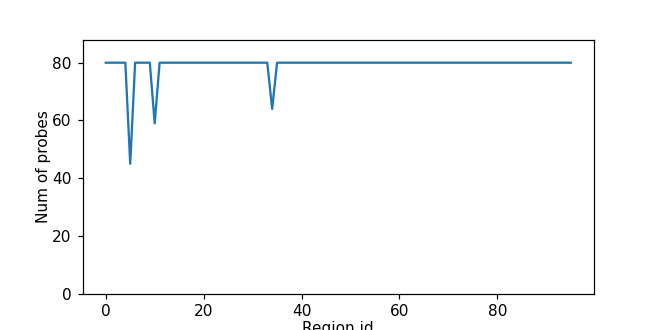

In [144]:
plt.style.use('default')
#plt.style.use('dark_background')

# Plot number of probes per region
plt.figure(figsize=(6,3), dpi=100)
plt.plot(list(reg_size_dic.values()))
#plt.plot(np.ones(len(pb_nums))*20)
plt.ylabel(f"Num of probes", labelpad=1)
plt.xlabel(f"Region id", labelpad=1)
plt.ylim([0, np.max(list(reg_size_dic.values()))*1.1])
plt.savefig(os.path.join(report_folder, 'afterblast_nProbes_per_region.png'),
            transparent=True, dpi=300)
plt.show()

# Create count table

In [ ]:
from ImageAnalysis3 import library_tools
from tqdm import tqdm
overwrite_table = False
# library
library_table_file = os.path.join(reference_folder, 'ctp11-12-13-mouse-chr7_17w.npy')

if not os.path.exists(library_table_file) or overwrite_table:
    # library
    _library_filenames = [os.path.join(library_folder, 'blast_full_probes.fasta')]
    print(len(_library_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=library_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_library_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=44) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)
else:
    print(f"reference table: {library_table_file} already exist, skip.")